In [248]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

In [236]:
url = "https://www.futhead.com/23/players/"

In [237]:
response #  if response is 200 continue else choose another Library or DataSource 

<Response [200]>

In [359]:
from selenium import webdriver
from bs4 import BeautifulSoup

# Set up the Selenium driver
driver = webdriver.Chrome()

# Number of pages to extract
num_pages = 8

# List to store all player names
player_names = []

# Loop through the pages
for page_num in range(1, num_pages + 1):
    # Construct the URL for each page
    url = f"https://www.futhead.com/23/players/?page={page_num}"

    # Navigate to the URL
    driver.get(url)

    # Get the page source after the JavaScript content has loaded
    page_source = driver.page_source

    # Create a BeautifulSoup object from the page source
    soup = BeautifulSoup(page_source, 'html.parser')

    # Extract the player names and append them to the list
    player_items = soup.find_all('span', class_='player-name')
    for item in player_items:
        player_names.append(item.text.strip())

# Close the Selenium driver
driver.quit()

# Print the list of all player names
print("All Player Names:")
print(player_names)



All Player Names:
['Lionel Messi', 'Lionel Messi', 'Pelé', 'Jude Bellingham', 'Victor Osimhen', 'Robert Lewandowski', 'Erling Haaland', 'Kylian Mbappé', 'Toni Kroos', 'Rafael Leão', 'Victor Osimhen', 'Kylian Mbappé', 'Karim Benzema', 'Luka Modrić', 'Robert Lewandowski', 'Jamal Musiala', 'Jude Bellingham', 'Kevin De Bruyne', 'Erling Haaland', 'Ronaldo', 'Zinedine Zidane', 'Kevin De Bruyne', 'Karim Benzema', 'Kylian Mbappé', 'Khvicha Kvaratskhelia', 'Khvicha Kvaratskhelia', 'Neymar Jr', 'Cristiano Ronaldo', 'Joshua Kimmich', 'Matthijs de Ligt', 'Mohamed Salah', 'Rúben Dias', 'Erling Haaland', 'Virgil van Dijk', 'Luka Modrić', 'Zinedine Zidane', 'Ronaldo', 'Pelé', 'Jordi Alba', 'Sergio Busquets', 'Jota', 'Christopher Nkunku', 'Lautaro Martínez', 'Nicolò Barella', 'Paulo Dybala', 'Marquinhos', 'Alexandre Lacazette', 'Pedri', 'Éder Militão', 'Vinícius Jr.', 'Christopher Nkunku', 'Sadio Mané', 'Leon Goretzka', 'Marcus Rashford', 'Harry Kane', 'Bernardo Silva', 'Alexis Sánchez', 'Franco Bares

In [350]:
all_player_names = []

# Loop through each element of the given list
for element in player_names:
    # Loop through each player name in the element and split it based on the comma delimiter
    for name in element:
        # Split the name into separate elements based on the comma delimiter
        split_names = name.split(',')
        # Append each split name to the new list
        for split_name in split_names:
            all_player_names.append(split_name.strip())


In [360]:
len(player_names)

384

In [361]:
player_stats = soup.find_all('span', class_='player-right text-center hidden-xs')
print(player_stats)

# Extract classes matching the regex pattern
rat_classes = []
for stat in player_stats:
    match = re.search('r<span class="value">(\d+)<\/span><span class="hover-label">PAC<\/span>', str(stat))
    if match:
        rat_classes.append(match.group(0))

# Remove HTML tags and extract values
rat_values = []
for cls in rat_classes:
    value = re.sub('r<span class="value">|</span>|<span class="hover-label">PAC<\/span>',"",  )
    rat_values.append(value)

print(rat_values)


[<span class="player-right text-center hidden-xs">
<span class="player-stat stream-col-60 hidden-md hidden-sm"><span class="value">86</span><span class="hover-label">PAC</span></span><span class="player-stat stream-col-60 hidden-md hidden-sm"><span class="value">62</span><span class="hover-label">SHO</span></span><span class="player-stat stream-col-60 hidden-md hidden-sm"><span class="value">81</span><span class="hover-label">PAS</span></span><span class="player-stat stream-col-60 hidden-md hidden-sm"><span class="value">83</span><span class="hover-label">DRI</span></span><span class="player-stat stream-col-60 hidden-md hidden-sm"><span class="value">91</span><span class="hover-label">DEF</span></span><span class="player-stat stream-col-60 hidden-md hidden-sm"><span class="value">91</span><span class="hover-label">PHY</span></span><span class="player-stat stream-col-60 font-12 font-medium text-upper">2</span>
</span>, <span class="player-right text-center hidden-xs">
<span class="playe

In [362]:
# List to store the extracted data
player_data = []

# Process the soup objects as needed
for soup in all_soups:
    # Extract the data
    data_items = soup.find_all('span', class_='player-right text-center hidden-xs')
    data_values = [item.text.strip() for item in data_items]
    
    # Append the data to the list
    player_data.extend(data_values)

print("Player Data:", player_data)


Player Data: ['94PAC97SHO96PAS99DRI40DEF79PHY2', '93PAC98SHO97PAS99DRI40DEF77PHY14', '95PAC96SHO93PAS96DRI60DEF76PHY4', '90PAC90SHO94PAS98DRI93DEF94PHY1', '99PAC97SHO82PAS94DRI55DEF95PHY1', '90PAC99SHO86PAS93DRI51DEF90PHY2', '97PAC97SHO82PAS90DRI61DEF95PHY1', '99PAC97SHO87PAS99DRI43DEF85PHY1', '90PAC87SHO96PAS93DRI92DEF90PHY2', '99PAC93SHO89PAS98DRI40DEF91PHY1', '99PAC97SHO82PAS94DRI55DEF95PHY4', '99PAC97SHO87PAS99DRI43DEF85PHY3', '93PAC96SHO89PAS93DRI45DEF94PHY2', '87PAC87SHO99PAS99DRI86DEF84PHY2', '90PAC99SHO86PAS93DRI51DEF90PHY3', '94PAC88SHO92PAS98DRI81DEF86PHY2', '90PAC90SHO94PAS98DRI93DEF94PHY1', '84PAC92SHO99PAS95DRI85DEF87PHY2', '97PAC97SHO82PAS90DRI61DEF95PHY2', '97PAC96SHO82PAS96DRI45DEF82PHY2', '86PAC93SHO96PAS95DRI81DEF88PHY2', '85PAC94SHO98PAS94DRI81DEF86PHY5', '92PAC97SHO90PAS94DRI45DEF90PHY4', '99PAC96SHO88PAS98DRI44DEF87PHY1', '98PAC91SHO92PAS98DRI52DEF82PHY1', '98PAC91SHO92PAS98DRI52DEF82PHY5', '95PAC93SHO92PAS99DRI44DEF71PHY1', '94PAC98SHO86PAS94DRI38DEF84PHY0', '86PA

In [363]:


# Lists to store the extracted data
pac = []
sho = []
pas = []
dri = []
def_ = []
phy = []

# Process the player data
for data in player_data:
    # Extract the numbers
    pac.append(int(re.search('(\d+)PAC', data).group(1)))
    sho.append(int(re.search('(\d+)SHO', data).group(1)))
    pas.append(int(re.search('(\d+)PAS', data).group(1)))
    dri.append(int(re.search('(\d+)DRI', data).group(1)))
    def_.append(int(re.search('(\d+)DEF', data).group(1)))
    phy.append(int(re.search('(\d+)PHY', data).group(1)))

print("PAC:", pac)
print("SHO:", sho)
print("PAS:", pas)
print("DRI:", dri)
print("DEF:", def_)
print("PHY:", phy)


PAC: [94, 93, 95, 90, 99, 90, 97, 99, 90, 99, 99, 99, 93, 87, 90, 94, 90, 84, 97, 97, 86, 85, 92, 99, 98, 98, 95, 94, 86, 90, 96, 88, 96, 88, 85, 85, 97, 96, 95, 87, 99, 97, 95, 90, 92, 90, 96, 92, 91, 99, 97, 96, 90, 99, 90, 89, 93, 84, 88, 84, 89, 87, 89, 89, 94, 88, 84, 95, 96, 94, 96, 93, 93, 90, 90, 99, 88, 92, 90, 95, 95, 95, 99, 94, 86, 93, 84, 90, 85, 93, 82, 92, 88, 95, 79, 94, 90, 94, 89, 92, 80, 98, 99, 90, 87, 91, 88, 92, 86, 90, 91, 91, 86, 85, 81, 93, 82, 99, 90, 99, 93, 93, 90, 93, 99, 99, 98, 94, 87, 95, 92, 96, 94, 91, 94, 95, 86, 83, 96, 98, 85, 98, 95, 97, 94, 90, 82, 82, 85, 85, 86, 83, 89, 90, 92, 90, 90, 94, 86, 98, 88, 85, 93, 95, 77, 94, 91, 93, 82, 90, 93, 81, 94, 86, 86, 83, 89, 93, 70, 94, 89, 90, 77, 90, 98, 90, 98, 85, 87, 92, 83, 87, 99, 90, 92, 92, 97, 90, 93, 95, 92, 97, 93, 88, 90, 95, 95, 94, 92, 98, 93, 87, 95, 99, 99, 86, 95, 96, 92, 97, 91, 90, 87, 90, 88, 93, 90, 88, 94, 87, 94, 92, 88, 93, 85, 77, 81, 80, 99, 81, 84, 90, 81, 89, 80, 87, 88, 92, 68

In [364]:
Fifa=pd.DataFrame({"Name":player_names,"Pac":pac,"Def":def_,"Dri":dri,"Phy":phy,"Pas":pas,"Sho":sho})
Fifa=Fifa.drop(1)




In [365]:
Fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 383
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    383 non-null    object
 1   Pac     383 non-null    int64 
 2   Def     383 non-null    int64 
 3   Dri     383 non-null    int64 
 4   Phy     383 non-null    int64 
 5   Pas     383 non-null    int64 
 6   Sho     383 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 23.9+ KB


In [367]:
Fifa["Pac"]=pd.to_numeric(Fifa["Pac"])
Fifa["Def"]=pd.to_numeric(Fifa["Def"])
Fifa["Dri"]=pd.to_numeric(Fifa["Dri"])
Fifa["Phy"]=pd.to_numeric(Fifa["Phy"])
Fifa["Pas"]=pd.to_numeric(Fifa["Pas"])
Fifa["Sho"]=pd.to_numeric(Fifa["Sho"])
Fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 383
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    383 non-null    object
 1   Pac     383 non-null    int64 
 2   Def     383 non-null    int64 
 3   Dri     383 non-null    int64 
 4   Phy     383 non-null    int64 
 5   Pas     383 non-null    int64 
 6   Sho     383 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 23.9+ KB


In [368]:
#dropping data of palyers whos name occur more than once
Fifa = Fifa.drop_duplicates(subset='Name', keep='first')


In [371]:
Fifa = Fifa.reset_index(drop=True)
Fifa

,Name,Pac,Def,Dri,Phy,Pas,Sho
0,Lionel Messi,94,40,99,79,96,97
1,Pelé,95,60,96,76,93,96
2,Jude Bellingham,90,93,98,94,94,90
3,Victor Osimhen,99,55,94,95,82,97
4,Robert Lewandowski,90,51,93,90,86,99
...,...,...,...,...,...,...,...
261,Sergio Ramos,83,92,77,88,78,72
262,Robin van Persie,85,46,90,74,87,94
263,Sócrates,84,45,90,84,91,90
264,Pavel Nedvěd,85,60,90,81,90,88


In [372]:
Fifa.head(20)

,Name,Pac,Def,Dri,Phy,Pas,Sho
0,Lionel Messi,94,40,99,79,96,97
1,Pelé,95,60,96,76,93,96
2,Jude Bellingham,90,93,98,94,94,90
3,Victor Osimhen,99,55,94,95,82,97
4,Robert Lewandowski,90,51,93,90,86,99
5,Erling Haaland,97,61,90,95,82,97
6,Kylian Mbappé,99,43,99,85,87,97
7,Toni Kroos,90,92,93,90,96,87
8,Rafael Leão,99,40,98,91,89,93
9,Karim Benzema,93,45,93,94,89,96


In [373]:
Fifa.describe()

,Pac,Def,Dri,Phy,Pas,Sho
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,90.778195,69.142857,90.270677,85.086466,86.706767,83.556391
std,5.096026,20.189720,6.243037,6.862810,6.475827,13.041249
min,68.000000,35.000000,58.000000,55.000000,63.000000,37.000000
25%,88.000000,50.000000,88.000000,81.000000,83.000000,80.000000
50%,91.000000,70.000000,92.000000,86.000000,88.000000,89.000000
75%,94.000000,90.000000,94.000000,90.000000,91.000000,92.000000
max,99.000000,97.000000,99.000000,98.000000,99.000000,99.000000


In [376]:
#player/s with highest DEF
Fifa[Fifa['Def']==max(Fifa['Def'])]

,Name,Pac,Def,Dri,Phy,Pas,Sho
21,Rúben Dias,88,97,83,97,83,48
22,Virgil van Dijk,88,97,83,94,80,65
33,Éder Militão,91,97,85,93,82,61
41,Franco Baresi,84,97,74,86,80,51
45,Paolo Maldini,87,97,72,87,77,57


In [378]:
Fifa.duplicated().sum(axis=0)

0

In [383]:
#player with highest and lowest Pac
A=Fifa[Fifa['Pac']==max(Fifa['Pac'])]#['Name']
B=Fifa[Fifa['Pac']==min(Fifa['Pac'])]#['Name']
print(A,"is/are the player/s with highest pac")
print(B,"is/are the player/s with lowest pac")


                 Name  Pac  Def  Dri  Phy  Pas  Sho
3      Victor Osimhen   99   55   94   95   82   97
6       Kylian Mbappé   99   43   99   85   87   97
8         Rafael Leão   99   40   98   91   89   93
25               Jota   99   58   98   81   92   90
34       Vinícius Jr.   99   41   98   81   89   90
37    Marcus Rashford   99   56   95   89   92   95
55     Theo Hernández   99   90   90   91   90   80
62       Moussa Diaby   99   54   98   75   90   89
79      Achraf Hakimi   99   90   91   91   90   81
84   Amahl Pellegrino   99   63   94   82   90   94
86    Federico Chiesa   99   60   95   86   92   92
91     Enner Valencia   99   63   91   93   83   91
92        Nuno Mendes   99   87   92   88   88   74
137          Grimaldo   99   88   93   85   92   75
158  Jeremie Frimpong   99   86   97   85   87   75
159   Alphonso Davies   99   84   92   86   90   76
216     Juan Cuadrado   99   84   94   85   86   84 is/are the player/s with highest pac
            Name  Pac  Def 

In [386]:
# Top 10 players with highest Phy
Fifa.sort_values(by='Phy',ascending=False)['Name'].head(10)

148         Seko Fofana
234            Palhinha
21           Rúben Dias
66             Casemiro
212       Gonçalo Ramos
19     Matthijs de Ligt
149      Moussa Sissoko
3        Victor Osimhen
63          Chuba Akpom
5        Erling Haaland
Name: Name, dtype: object

In [389]:
#A new dataframe with NAME and PHY
new_fifa=pd.DataFrame({"Name":player_names,"Phy":phy})
new_fifa

,Name,Phy
0,Lionel Messi,79
1,Lionel Messi,77
2,Pelé,76
3,Jude Bellingham,94
4,Victor Osimhen,95
...,...,...
379,Robert Pirès,64
380,Philipp Lahm,73
381,Pavel Nedvěd,81
382,Paul Scholes,82


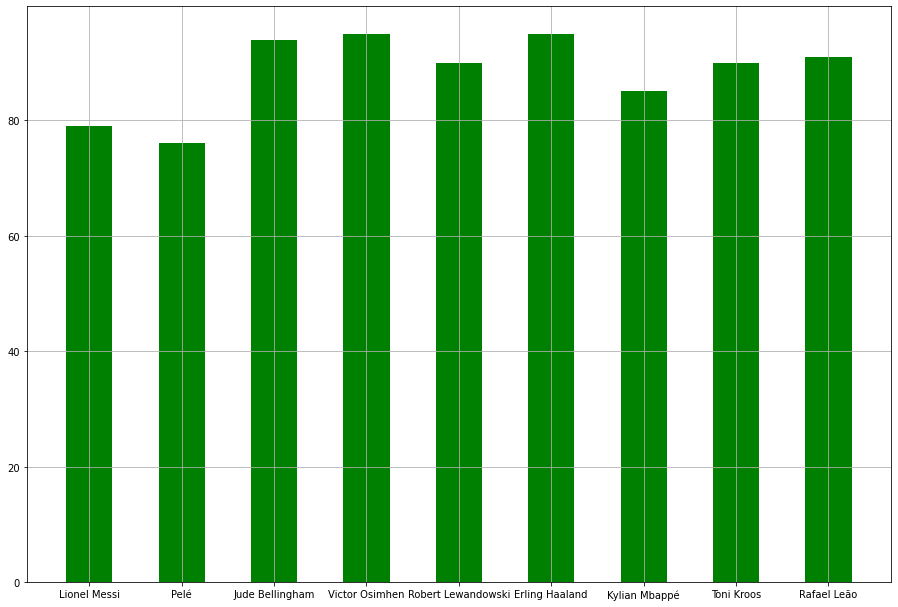

In [418]:
x=new_fifa['Name'].head(10)
y=new_fifa['Phy'].head(10)
fig=plt.figure()
ax=fig.add_axes([5,5,2,2])# increasing the canvas size 
ax.bar(x,y,color='green',width=0.5)
#lionel messi is ommitted since it occurs twice
plt.grid()

In [430]:
#print players with top 10 pac and create a graph acc
x=[Fifa.sort_values(by='Pac',ascending=False).head(10)]
y=[Fifa.sort_values(by='Pac',ascending=False)['Name'].head(10)]
#Alternatively
#top_10_pac = Fifa.sort_values(by='Pac', ascending=False).head(10)
#x = top_10_pac['Name']
#y = top_10_pac['Pac']

In [429]:
y

[84     Amahl Pellegrino
 92          Nuno Mendes
 137            Grimaldo
 159     Alphonso Davies
 158    Jeremie Frimpong
 62         Moussa Diaby
 34         Vinícius Jr.
 55       Theo Hernández
 216       Juan Cuadrado
 37      Marcus Rashford
 Name: Name, dtype: object]

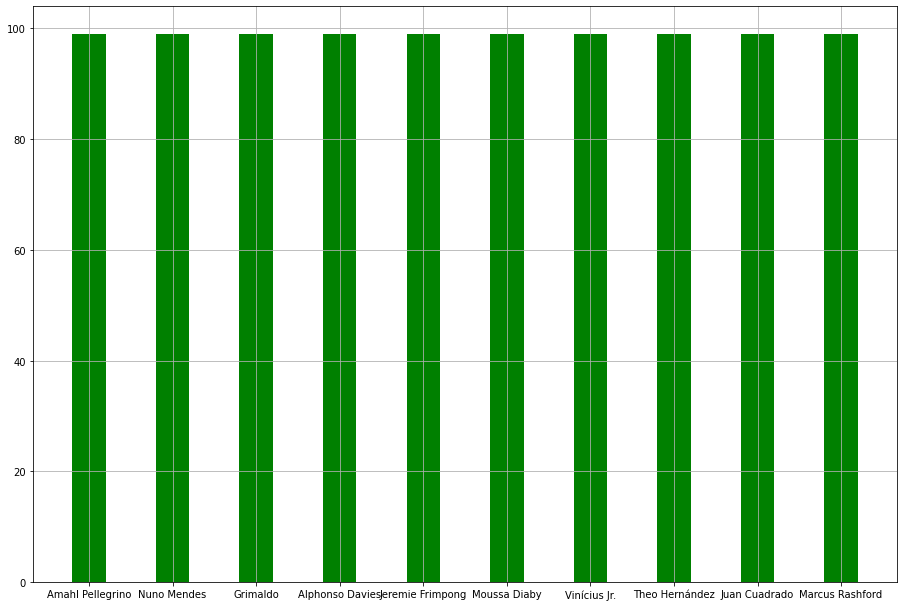

In [432]:
fig=plt.figure()
ax=fig.add_axes([5,5,2,2])
ax.bar(x,y,color='Green',width=0.4)
ax.grid()


In [ ]:
fig = plt.figure()
ax = fig.add_axes([5, 5, 2, 2])
ax.bar(m, z['Sho'], color='green', width=0.4)
plt.xlabel('Player Name')
plt.ylabel('Sho')
plt.title('Players with Sho >= 80')
plt.grid(True)
plt.show() ##please don't run this piece of code to avoid system failure
z = Fifa[Fifa['Sho'] >= 80]
m = z['Name']


In [445]:
z=Fifa[(Fifa['Dri']>90) &(Fifa['Pac']>95)]
z

,Name,Pac,Def,Dri,Phy,Pas,Sho
3,Victor Osimhen,99,55,94,95,82,97
6,Kylian Mbappé,99,43,99,85,87,97
8,Rafael Leão,99,40,98,91,89,93
13,Ronaldo,97,45,96,82,82,96
15,Khvicha Kvaratskhelia,98,52,98,82,92,91
20,Mohamed Salah,96,54,97,83,90,95
25,Jota,99,58,98,81,92,90
26,Christopher Nkunku,97,77,97,81,93,91
31,Alexandre Lacazette,96,56,95,92,92,92
34,Vinícius Jr.,99,41,98,81,89,90


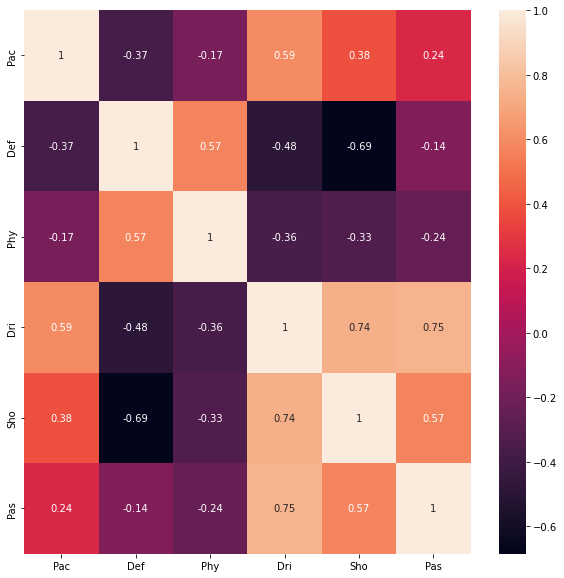

In [455]:
Subset = Fifa[['Pac','Def','Phy','Dri','Sho','Pas']]
plt.figure(figsize=(10,10))
sns.heatmap(Subset.corr(),annot=True)
plt.show()


In [447]:
Fifa.corr()

,Pac,Def,Dri,Phy,Pas,Sho
Pac,1.000000,-0.370347,0.593884,-0.167126,0.235522,0.384284
Def,-0.370347,1.000000,-0.483693,0.566419,-0.137668,-0.685011
Dri,0.593884,-0.483693,1.000000,-0.356903,0.753629,0.742877
Phy,-0.167126,0.566419,-0.356903,1.000000,-0.241420,-0.331984
Pas,0.235522,-0.137668,0.753629,-0.241420,1.000000,0.566684
Sho,0.384284,-0.685011,0.742877,-0.331984,0.566684,1.000000


In [ ]:
"""
By the above Data Analysis we found out that the three most imp attribute in a player are 
DRI
PAC
SHO 
accordingly
"""